In [11]:
from pylab import cos, linspace, subplots
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from tqdm import tqdm, tqdm_notebook

In [12]:
#MANUAL DELAY EQUATION APPROXIMATOR
def H(x):
    if x >= 0:
        return 1
    else:
        return 0
def h1(x):
    return x[0]
def h2(x):
    return x[1]

def values_before_zero(t,a=1,b=2,c=1):
    x = np.array([a,b,c])#np.array([a-t,b-t,c+t])
    return x

def integrand1(x,v):
    return (-2 * H(h1(x)) + 1)

def integrand2(x,v):
    return (-2 * H(h2(x)) + 1)

def integrand3(x,v):
    return ((1-v)*(2*H(h1(x))*H(h2(x)) - H(h1(x)) - H(h2(x))) +1)

integrands = [integrand1,integrand2,integrand3]

def integrate_avg(yy,t,delta,v,debug = False):
    # take average of the velocity of each particle in the previous t-delta time steps up     
    def integral(inte,int_range,t_range,v):
        
        vector_field_over_last_t_minus_delta = np.apply_along_axis(lambda x : inte(x,v = v),1,int_range) 
        
        if debug:
            print('t length =',len(t_range))
            #print('integrand3 = ',np.apply_along_axis(lambda x: integrand3(x,v),1,int_range))
            print('ratio=',len(t_range)*tstep/delta)
            print('time_range=',t_range)
            print('diff',t_range[-1] - t_range[0])
            print('int_range',int_range)
            print('shape x',np.shape(int_range[0]))
            
        return np.sum(vector_field_over_last_t_minus_delta,axis = 0)/len(int_range)
    
    # i = position of t in tt
    if np.where(tt == t) == []:
        raise Exception('No such value of t in tt')
    i = np.where(tt == t)[0][0]
    # j = position of t-delta in tt (rounded)
    j = np.argmin(np.abs((t-delta) - tt)) #- 1 #position of closest element in tt to t - delta
    difference = tt[0] - (t- delta) # if t - delta is less than the lowest in tt, we have to create new values

    if difference >= 0:
        prev_time = np.arange(t-delta, tstep ,tstep) #time range before zero
        prev_vals = np.row_stack([values_before_zero(t) for t in prev_time]) #values before zero
        
        time_range = np.hstack((prev_time,tt[0:i])) # all the time values in the relevant range (t-delta up to t) 
        integration_range = np.vstack((prev_vals,yy[0:i])) #the actual values of the particle over the relevant time

        avgs = []
        for inte in integrands:
            
            avgs +=  [integral(inte,integration_range,time_range,v)]## this might have to be len(integration_range)*tstep
            
        return np.array(avgs)

    elif difference < 0:
        time_range = tt[j:i]
        integration_range = yy[j:i]

        avgs = []
        for inte in integrands:
            avgs +=  [integral(inte,integration_range,time_range,v)]
            
        return np.array(avgs)
    
    else:
        print('error')


def model(tt,delta,v, debug = False):
    yy = np.zeros((n,len(values_before_zero(0)))) + values_before_zero(0)
    for i,t in enumerate(tqdm(tt,position=0,leave = False,desc = 'model')):
        velocity = integrate_avg(yy,t,delta,v, debug = debug)
        yy[i,:] = yy[i-1,:] + tstep*velocity
        if debug:
            print('velocity =',velocity)
            print('t = ',t)
    return yy

def anal_doty3(v,phi):
    if 0 <= phi <= .5:
        return 1 + 2*phi*(v-1)
    elif .5 <= phi <= 1:
        return -1 + 2*(phi + v - phi*v)
    
def numeric_doty3(yy,tstart= 2.1):
    return (yy[-1,2] - yy[int(n*tstart/T),2])/(tt[-1] - tt[int(n*tstart/T)])

v= -1
n = 10000


delay z grad =  -0.9999000000003345
delta = 0.0011
phi = 0.5454545454545041
r+phi = 454.5454545454545
1+2phi(v-1) =  -1.1818181818180165 -1+2*(v+phi-v*phi) = -0.8181818181819835


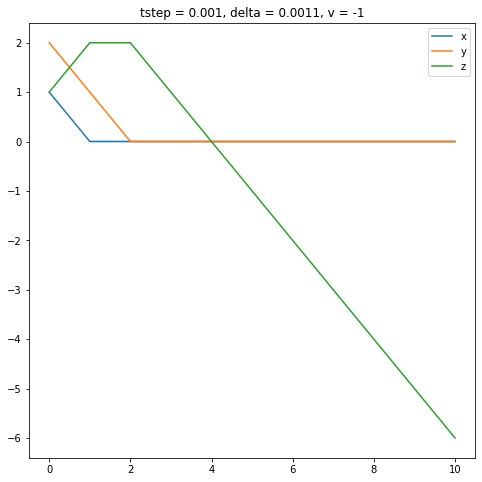

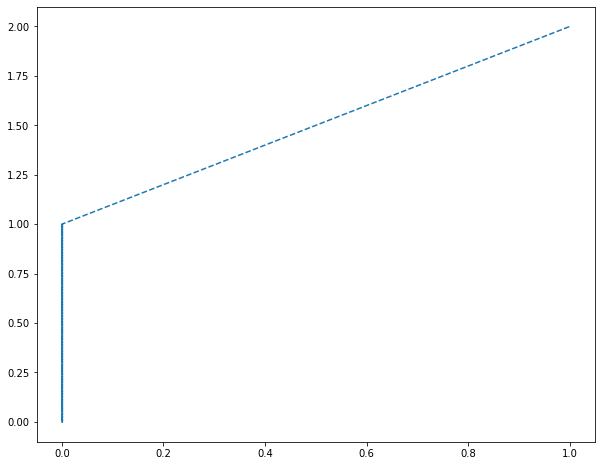

In [3]:
debug = 0

T = 10
tstep = 10**-3

delta =  10**-3*(1+0.1)#0.018461538461538464
a,b,c = 1,2,1 
v = -1
print('v=',v)

n = int(T/tstep)
print('n =',n)

tt = np.linspace(0, T, n)

yyy = model(tt,delta,v,debug = debug)

fig, ax = subplots(1, figsize=(8, 8))
ax.plot(tt, yyy[:,0],label='x')
ax.plot(tt, yyy[:,1],label='y')
ax.plot(tt, yyy[:,2],label='z')

plt.title("tstep = {}, delta = {}, v = {}".format(tstep,delta,v))
ax.legend()
ax.figure.savefig("variable_delay.jpeg")

print('delay z grad = ', (yyy[-1,2] - yyy[int(n*(T-.9)/T),2])/(tt[-1] - tt[int(n*(T-.9)/T)]))

r = int(1/(2*delta))
phi = 1/(2*delta) - r
print('delta =',delta)
print("phi =", phi)
print('r+phi =', 1/(2*delta))

print('1+2phi(v-1) = ',1+2*phi*(v-1), '-1+2*(v+phi-v*phi) =',-1 + 2*(phi + v - phi*v))

plt.figure(figsize=(10,8))
plt.plot(yyy[:,0],yyy[:,1],'--')

n = 300
deltas = [ 0.5        10.          5.          3.33333333  2.5         2.
  1.66666667  1.42857143  1.25        1.11111111  1.          0.90909091
  0.83333333  0.76923077  0.71428571  0.66666667  0.625       0.58823529
  0.55555556  0.52631579]
phis = [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]
vs = [-1.  1.]
1th v / 2


2th v / 2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


-1.0 1.0
-0.9966666666666675


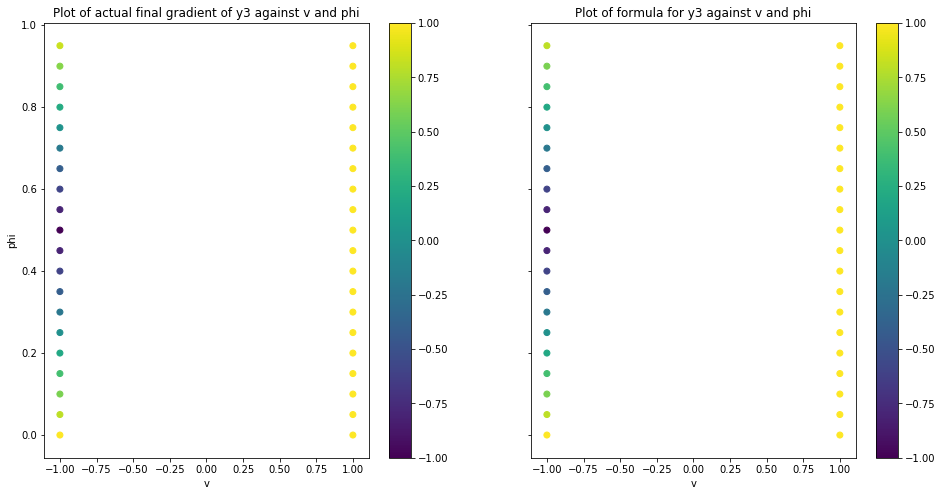

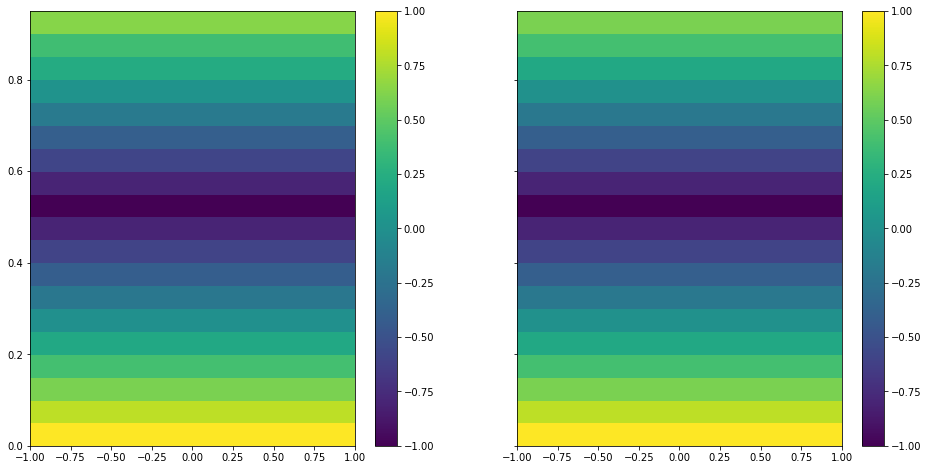

In [4]:
# tstep should be roughly 100 times smaller than the smallest delta
tstep = 0.01#0.0005
phi_num = 20#25
v_num = 2#15

T = 3

tstart = T - .9
delta_max = .75

D = int(1 / (2*delta_max))


n = int(T/tstep)
print('n =',n)

a,b,c = 1,2,1


vs = np.linspace(-1,1,v_num)
deltas = np.array([phi_num/(2*(phi_num)*(phi_num*D+1))]+[phi_num/(2*n*(phi_num*D+1)) for n in range(1,phi_num)])

print('deltas =', deltas)
phis = 1/(2*deltas) - np.floor(1/(2*deltas))
print('phis =',phis)
print('vs =',vs)
tt = np.linspace(0, T, n)

doty3s = np.zeros((len(deltas),len(vs),2))


#fig_plots, axs = subplots(len(deltas),len(vs),figsize=(128,128))

yys = np.zeros((len(deltas),len(vs),len(tt),3))

for i,vi in enumerate(vs):
    print('{}th v / {}'.format(i+1,v_num))
    for deltaj,(j,phij) in zip(deltas,enumerate(phis)):
        yyji = model(tt,deltaj,vi,debug = debug)
        doty3s[j,i,0] = numeric_doty3(yyji,tstart = tstart)
        doty3s[j,i,1] = anal_doty3(vi,phij)
        yys[j,i,:,:] = yyji                                   
        #axs[phi_num-j-1,i].plot(tt,yyji) #so that it aligns with the colour graphs
        
V,P = np.meshgrid(vs,phis)
    
fig, [ax1,ax2] = subplots(1,2, figsize=(16, 8),sharey=True)
figp, [ax1p,ax2p] = subplots(1,2, figsize=(16, 8),sharey=True)
cm = col.LinearSegmentedColormap('viridis', 1024)

vmin,vmax = np.min(doty3s[:,:,:]),np.max(doty3s[:,:,:])

numeric_results = ax1.scatter(V,P,c = doty3s[:,:,0],vmin=vmin,vmax=vmax)
numeric_results = ax1p.pcolor(V,P,doty3s[:,:,0],vmin=vmin,vmax=vmax)
ax1.set_title('Plot of actual final gradient of y3 against v and phi')
ax1.set_xlabel('v')
ax1.set_ylabel('phi')

anal_results = ax2.scatter(V,P,c = doty3s[:,:,1],vmin=vmin,vmax=vmax)
anal_results = ax2p.pcolor(V,P,doty3s[:,:,1],vmin=vmin,vmax=vmax)
ax2.set_title('Plot of formula for y3 against v and phi')
ax2.set_xlabel('v')


fig.colorbar(anal_results,ax=ax2)
fig.colorbar(numeric_results,ax=ax1)

figp.colorbar(anal_results,ax=ax2p)
figp.colorbar(numeric_results,ax=ax1p)

fig.show()
figp.show()
#fig_plots.show()

print(vmin,vmax)
print(np.min(doty3s[:,:,0]))


v = -1.0
phi = 0.0
delta = 0.5


2.9999999999999796
num_dot from above 0.9966666666666485
rerun numdot 0.9966666666666454


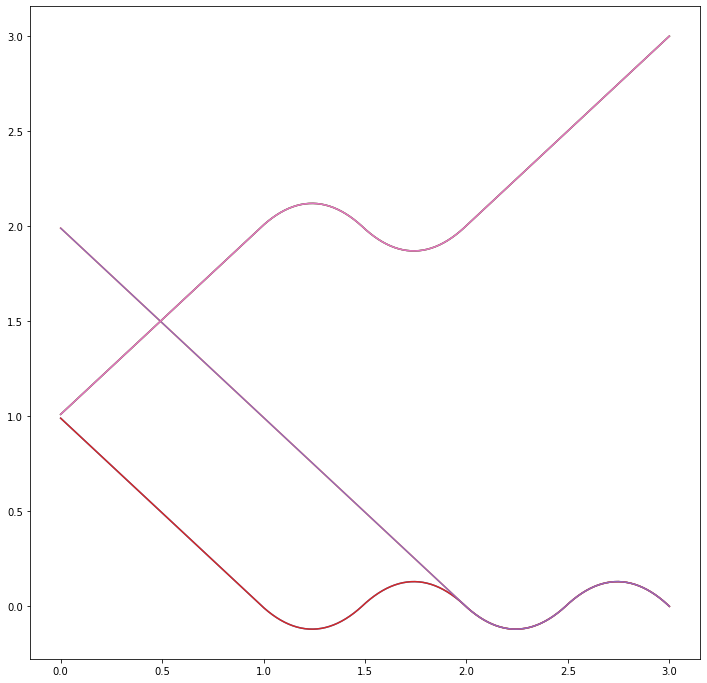

In [5]:
debug = 0

tt = np.linspace(0, T, n)

j,i = 0,0
print('v =',vs[i])
print('phi =',phis[j])
print('delta =',deltas[j])

zoom1,zoom2 = -0,n

fig,ax = subplots(1,figsize = (12,12))
ax.plot(tt[zoom1:zoom2],yys[j,i,zoom1:zoom2])

yy = model(tt,deltas[j],vs[i],debug = debug)
ax.plot(tt[zoom1:zoom2],yy[zoom1:zoom2])
ax.plot(tt[zoom1:zoom2],yys[j,i,:,2])

print(yys[j,i,-1,-1])
print('num_dot from above',numeric_doty3(yys[j,i],tstart = T -0.1))
print('rerun numdot',numeric_doty3(yy,tstart = T-.9))

n = 300
1/(2*delta)= 50.0
phi = 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21.33it/s]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


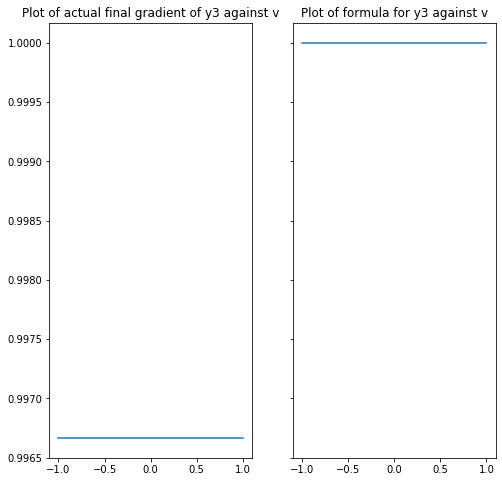

In [6]:

T = 3
tstep = 0.01#0.0001

n = int(T/tstep)
print('n =',n)

delta =  0.01 
a,b,c = 1,2,1
v = -1
v_num = 2


r = int(1/(2*delta))
print('1/(2*delta)=',1/(2*delta))
phi = 1/(2*delta) - r
print("phi =", phi)


vs = np.linspace(-1,1,v_num)
tt = np.linspace(0, T, n)



doty3s = np.zeros((len(vs),2))


for i,v in enumerate(tqdm(vs)):
    yy = model(tt,delta,v)
    doty3s[i,0] = numeric_doty3(yy)
    doty3s[i,1] = anal_doty3(v,phi)
    
    
fig, [ax1,ax2] = subplots(1,2, figsize=(8, 8),sharey=True)
ax1.plot(vs,doty3s[:,0])
ax1.set_title('Plot of actual final gradient of y3 against v')
ax2.plot(vs,doty3s[:,1])
ax2.set_title('Plot of formula for y3 against v')
ax.figure.savefig("doty3 against v.jpeg")
fig.show()




**$\epsilon$ -greedy algorithm**

In [7]:
# Reward matrix when players defect/cooperate
# (e.g. first player cooperating and second defecting would give reward
# of 0 to first player and 4 to second player)
reward = np.array([[1,4],[0,3]])

# The value of 'epsilon' in epsilon-greedy
eps = 0.1

# Epislon-greedy policies when defecting/cooperating greedily
# PD, PC
policy = np.array([[1-eps/2,eps/2], [eps/2,1-eps/2]])

# Conversion between q and z coordinates
# (rotate q by -45 degrees to transform to z)
# (z[0] measures distance to diagonal, z[1] measures distance along diagonal)
ztoq = np.array([[1,-1],[1,1]]) / np.sqrt(2)
qtoz = ztoq.transpose()

# The coop/coop vector field is tangent to the diagonal at (qc,qc) and
# the defect/defect vector field is tangent to the diagonal at (qd,qd).
qd, qc = [(policy[i] * (reward @ policy[i])).dot([-1,1])/policy[i].dot([-1,1]) for i in range(2)]

xd, _ = qtoz @ [qd,qd]
xc, _ = qtoz @ [qc,qc]

# Vector field in q coordinates when the greedy actions for each players are given by the pair 'greedy'
# (e.g. 'greedy=(1,0)' means player one/two cooperates/defects greedily)
def qdot(q, greedy):
    pi0, pi1 = policy[greedy[0]], policy[greedy[1]]
    return np.array([pi0 * (reward @ pi1 - q[0]), pi1 * (reward @ pi0 - q[1])]).reshape(4,)

# The vector field in z coordinates
def zdot(z, greedy):
    qd0, qd1 = qdot((ztoq @ z[0], ztoq @ z[1]), greedy)
    return qtoz @ qd0, qtoz @ qd1


def qdot_all(z):
    #v = [np.concatenate(zdot(z, g)) for g in [(1,1),(0,1),(0,0),(1,0)]]
    #return np.column_stack(v)
    return [qdot(z, g) for g in [(0,0),(0,1),(1,0),(1,1)]]


# Calculate zdot for all quadrants in counterclockwise direction
# (first quadrant corresponds to both players cooperating,
# second quadrant corresponds to first player defecting and second player cooperating, etc.)
def zdot_all(z):
    #v = [np.concatenate(zdot(z, g)) for g in [(1,1),(0,1),(0,0),(1,0)]]
    #return np.column_stack(v)
    return [zdot(z, g) for g in [(1,1),(0,1),(0,0),(1,0)]]
def dA(x):
    return x[1]-x[0] # > 0 means A is cooperating, g = 1
def dB(x):
    return x[3]-x[2]
def which_quadrant(x):
    if dA(x) > 0 and dB(x) >= 0:
        return 0
    if dA(x) <= 0 and dB(x) > 0:
        return 1
    if dA(x) < 0 and dB(x) <= 0:
        return 2
    if dA(x) >= 0 and dB(x) < 0:
        return 3
    else:
        return 10

def qdot_all_dieci_convention(x):
    #v = [np.concatenate(zdot(z, g)) for g in [(1,1),(0,1),(0,0),(1,0)]]
    #return np.column_stack(v)
    #return [qdot(x, g) for g in [(1,1),(0,1),(1,0),(0,0)]]
    return (qdot(x, g) for g in [(1,1),(0,1),(1,0),(0,0)])

In [8]:
opportunistic_defection_start = (2.83,2.85,2.73,2.85)
opportunistic_defection_later = (2.85,2.85,2.68,2.68)#(2.8285,2.8270,2.635,2.636)
bjorns_start = (2.8,2.801,2.845,2.99)
bjorns_dual_slide_start = (2.86515512, 2.86515512,2.78737338, 2.78737338)
debug_bi_start = (2.7937573,  2.79373824, 2.20117745, 2.20118088)

n = 20000000


euler_model:   5%|██▌                                                     | 916203/20000000 [00:20<08:01, 39605.37it/s]

KeyboardInterrupt: 

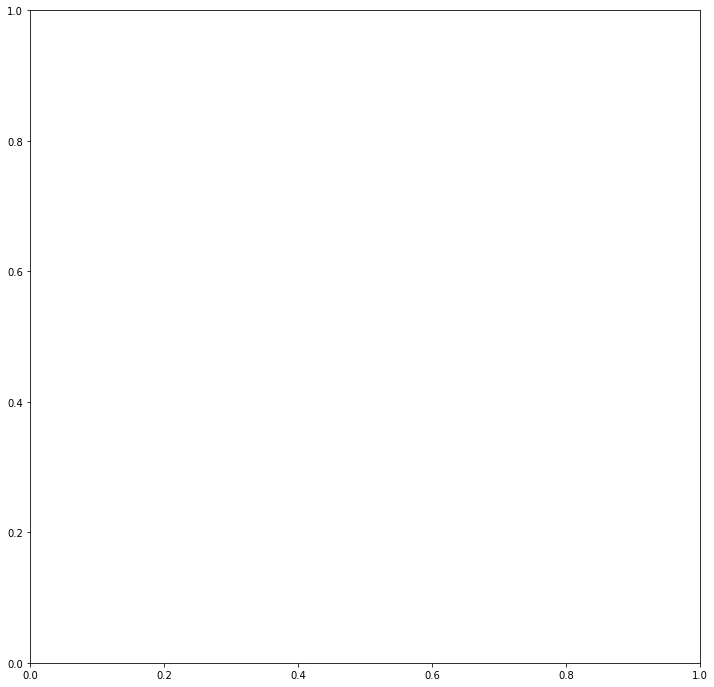

In [9]:
T = 20

tstep = 10**-6
n = int(T/tstep)
print('n =',n)
tt = linspace(0, T, n,dtype=np.float32)

def vector(x,i):
        t = tt[i]
        
        #field = which_quadrant(yy[i,:])
        if x[1] - x[0] == 0:
            print('pizza time 1')
        if x[3] - x[2] == 0:
            print('pizza time 2')
        d1 = int(x[1] - x[0] > 0)
        d2 = int(x[3] - x[2] > 0)
        #print(d1,d2)
        #print(yy[i])
        #vect = integrand(x)
        vect = qdot((x[0:2],x[2:4]), (d1,d2))
        #print(qdot((yy[i,0:2],yy[i,2:4]), (1,1)))
        #print(vect)
        if i == n - 2: 
            print(d1,d2)
        return vect
def euler_model(tt,tstep):
    yy = np.zeros((n,4),dtype=np.float32) + bjorns_start
    for i,t in enumerate(tqdm(tt,position=0,leave = False,desc = 'euler_model')):
        yy[i,:] = yy[i-1,:] + tstep*vector(yy[i-1],i-1)
    return yy

fig, ax = subplots(1, figsize=(12, 12))
ax.plot(tt,euler_model(tt,tstep))

In [13]:
def H(x):
    if x >= 0: #this = might actually be doing a lot, defaulting to R4
        return 1
    else:
        return 0

# difference of qa values
def h1(x):
    return x[1] - x[0]
# difference of qb values
def h2(x):
    return x[3] - x[2]

# heaviside of difference of qa values
def H1(x): 
    return H(h1(x))
# heaviside of difference of qb values
def H2(x):
    return H(h2(x))

# sets initial value
def values_before_zero(t):
    x = np.array([qa10,qa20,qb10,qb20])
    return x

def f1(x): # h1,h2< 0 i.e. both players defecting
    return qdot((x[0:2],x[2:4]), (0,0))
def f2(x): # h1<0,h2>0 i.e. defecting,cooperating
    return qdot((x[0:2],x[2:4]), (0,1))
def f3(x): # h1>0,h2<0 i.e. cooperating,defecting
    return qdot((x[0:2],x[2:4]), (1,0))
def f4(x): # h1,h2> 0 i.e. both players cooperating
    return qdot((x[0:2],x[2:4]), (1,1))

def integrand(x):
    return H1(x)*H2(x)*(f4(x)-f3(x)-f2(x) + f1(x)) + H1(x)*(f3(x) - f1(x)) + H2(x)*(f2(x) - f1(x)) + f1(x)

def integrand0(x):
    return integrand(x)[0]

def integrand1(x):
    return integrand(x)[1]

def integrand2(x):
    return integrand(x)[2]

def integrand3(x):
    return integrand(x)[3]


integrands = [integrand0,integrand1,integrand2,integrand3]

def integrate_avg(yy,t,delta,debug = False):
    # take average of the velocity of each particle in the previous t-delta time steps up 
    def integral(inte,int_range,t_range):
        
        vector_field_over_last_t_minus_delta = np.apply_along_axis(inte,1,int_range) 
        
        if debug:
            #print('t length =',len(t_range))
            print('integrand(x) = ',np.apply_along_axis(lambda x: integrand(x),1,int_range))
            #print('ratio=',len(t_range)*tstep/delta)
            #print('time_range=',t_range)
            #print('diff',t_range[-1] - t_range[0])
            #print('int_range',int_range)
            #print('shape x',np.shape(int_range[0]))
            
        return np.sum(vector_field_over_last_t_minus_delta,axis = 0)/len(int_range)
    
    # i = position of t in tt
    if np.where(tt == t) == []:
        raise Exception('No such value of t in tt')
    i = np.where(tt == t)[0][0]
    # j = position of t-delta in tt (rounded)
    j = np.argmin(np.abs((t-delta) - tt)) #- 1 #position of closest element in tt to t - delta
    difference = tt[0] - (t-delta) # if t - delta is less than the lowest in tt, we have to create new values

    if difference >= 0:
        prev_time = np.arange(t-delta, tstep ,tstep) #time range before zero
        prev_vals = np.row_stack([values_before_zero(t) for t in prev_time]) #values before zero
        
        time_range = np.hstack((prev_time,tt[0:i])) # all the time values in the relevant range (t-delta up to t) 
        integration_range = np.vstack((prev_vals,yy[0:i])) #the actual values of the particle over the relevant time

        avgs = []
        for inte in integrands:
            avgs +=  [integral(inte,integration_range,time_range)]## this might have to be len(integration_range)*tstep
        return np.array(avgs)

    elif difference < 0:
        time_range = tt[j:i]
        integration_range = yy[j:i]

        avgs = []
        for inte in integrands:
            #print('int=',integral(inte,integration_range,time_range))
            avgs +=  [integral(inte,integration_range,time_range)]
        return np.array(avgs)
    else:
        print('error')
        
        
def model(tt,delta,debug = 0):
    yy = np.zeros((n,4))+values_before_zero(0)
    for i,t in enumerate(tqdm(tt,position=0,leave = False,desc = 'model')):
        velocity = integrate_avg(yy,t,delta,debug = debug)
        if debug:
            print('velocity =',velocity)
        yy[i,:] = yy[i-1,:] + tstep*velocity
    return yy

[2.80151551 2.80151551] [2.72373377 2.72373377]
2.86515512 2.86515512 2.78737338 2.78737338
n = 2000


Text(0.5, 1.0, 'phase diagram')

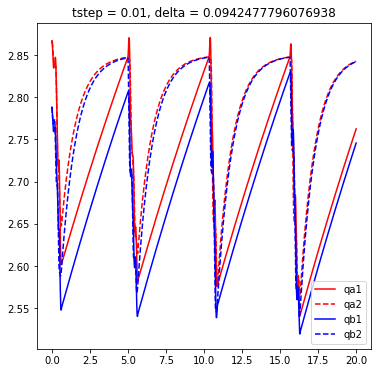

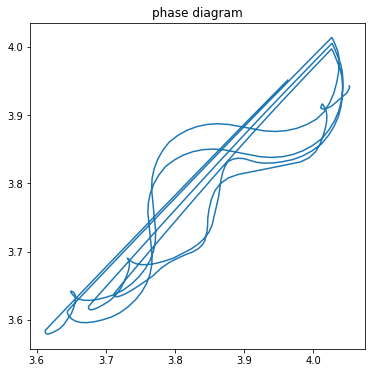

In [16]:
debug = 0

T = 20

tstep = 10**-2#10**-5 +10**-4*2.5 #(10**-5 +10**-4*2.5)*50
delta = 10**-2*np.pi*3#(10**-5 +10**-4*2.5)*1001.2345

a,b = ztoq @ (xc+eps/10,0), ztoq @ (xc-eps,0)
print(a,b)
qa10,qa20,qb10,qb20 = bjorns_dual_slide_start  #opportunistic_defection_start
print(qa10,qa20,qb10,qb20)

n = int(T/tstep)
print('n =',n)

tt = linspace(0, T, n)
yy = model(tt,delta,debug = debug)

fig, ax = subplots(1, figsize=(6, 6))
ax.plot(tt, yy[:,0],'r-',label='qa1')
ax.plot(tt, yy[:,1],'r--',label='qa2')
ax.plot(tt, yy[:,2],'b-',label='qb1')
ax.plot(tt, yy[:,3],'b--',label='qb2')


plt.title("tstep = {}, delta = {}".format(tstep,delta))
ax.legend()
ax.figure.savefig("variable_delay.jpeg")

fig_phase,ax_phase = subplots(1,figsize=(6,6))
ax_phase.plot((yy[:,0] + yy[:,1])/np.sqrt(2), (yy[:,2] + yy[:,3])/np.sqrt(2))
plt.title('phase diagram')